# US Accidents Exploratory Data Analysis

## Fetching Data

In [1]:
# import os
# from kaggle.api.kaggle_api_extended import KaggleApi

# # Set your Kaggle API credentials
# api = KaggleApi()
# api.authenticate()

# # Download the dataset
# api.dataset_download_files('sobhanmoosavi/us-accidents', path='./Data/', unzip=True)
# api.dataset_download_files('satyabrataroy/us-states-map',path ='./Data/',unzip=True)

## Data Understanding 

### Description

This is a countrywide car accident dataset that covers ``49`` states of the USA. The accident data were collected from ```February 2016``` to ```March 2023```, using multiple APIs that provide streaming traffic incident (or event) data. 

- These APIs broadcast traffic data captured by various entities,such as:
    
    - US and state departments of transportation
    - law enforcement agencies
    - traffic cameras, and traffic sensors within the road networks.
      

- The dataset currently contains approximately ```7.7 million accident records```. 

### Coverage

    The dataset covers 49 states of the US 50 states -- (New York) Excluded.  

![Frequency of data](Images/newplot(1).png)

### Columns

- ```Attribute```	```Description```	```Nullable```
- ```ID```   	This is a unique identifier of the accident record.	```No```
- ```Severity```   	Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).	```No```
#### Time Attributes :
- ```Start_Time```   	Shows start time of the accident in local time zone.	```No```
- ```End_Time```   	Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.	```No```
- ```Timezone```	Shows timezone based on the location of the accident (eastern, central, etc.).	```Yes```
- ```Sunrise_Sunset```	Shows the period of day (i.e. day or night) based on sunrise/sunset.	```Yes```
- ```Civil_Twilight```	Shows the period of day (i.e. day or night) based on civil twilight.	```Yes```
- ```Nautical_Twilight```	Shows the period of day (i.e. day or night) based on nautical twilight.	```Yes```
- ```Astronomical_Twilight```	Shows the period of day (i.e. day or night) based on astronomical twilight.	```Yes```
#### Location Attributes :
- ```Start_Lat```   	Shows latitude in GPS coordinate of the start point.	```No```
- ```Start_Lng```   	Shows longitude in GPS coordinate of the start point.	```No```
- ```End_Lat```   	Shows latitude in GPS coordinate of the end point.	```Yes```
- ```End_Lng```   	Shows longitude in GPS coordinate of the end point.	```Yes```
- ```Distance```   (mi)	The length of the road extent affected by the accident.	```No```
- ```Description```	Shows natural language description of the accident.	```No```
- ```Number```	Shows the street number in address field.	```Yes```
- ```Street```	Shows the street name in address field.	```Yes```
- ```Side```	Shows the relative side of the street (Right/Left) in address field.	```Yes```
- ```City```	Shows the city in address field.	```Yes```
- ```County```	Shows the county in address field.	```Yes```
- ```State```	Shows the state in address field.	```Yes```
- ```Zipcode```	Shows the zipcode in address field.	```Yes```
- ```Country```	Shows the country in address field.	```Yes```
- ```Amenity```	A POI annotation which indicates presence of amenity in a nearby location.	```No```
- ```Bump```	A POI annotation which indicates presence of speed bump or hump in a nearby location.	```No```
- ```Crossing```	A POI annotation which indicates presence of crossing in a nearby location.	```No```
- ```Give_Way```	A POI annotation which indicates presence of give_way in a nearby location.	```No```
- ```Junction```	A POI annotation which indicates presence of junction in a nearby location.	```No```
- ```No_Exit```	A POI annotation which indicates presence of no_exit in a nearby location.	```No```
- ```Railway```	A POI annotation which indicates presence of railway in a nearby location.	```No```
- ```Roundabout```	A POI annotation which indicates presence of roundabout in a nearby location.	```No```
- ```Station```	A POI annotation which indicates presence of station in a nearby location.	```No```
- ```Stop```	A POI annotation which indicates presence of stop in a nearby location.	```No```
- ```Traffic_Calming```	A POI annotation which indicates presence of traffic_calming in a nearby location.	```No```
- ```Traffic_Signal```	A POI annotation which indicates presence of traffic_signal in a nearby loction.	```No```
- ```Turning_Loop```	A POI annotation which indicates presence of turning_loop in a nearby location.	```No```
#### Weather Attributes :
- ```Airport_Code```	Denotes an airport-based weather station which is the closest one to location of the accident.	```Yes```
- ```Weather_Timestamp```	Shows the time-stamp of weather observation record (in local time).	```Yes```
- ```Temperature```(F)	Shows the temperature (in Fahrenheit).	```Yes```
- ```Wind_Chill```(F)	Shows the wind chill (in Fahrenheit).	```Yes```
- ```Humidity```(%)	Shows the humidity (in percentage).	```Yes```
- ```Pressure```(in)	Shows the air pressure (in inches).	```Yes```
- ```Visibility```(mi)	Shows visibility (in miles).	```Yes```
- ```Wind_Direction```	Shows wind direction.	```Yes```
- ```Wind_Speed```(mph)	Shows wind speed (in miles per hour).	```Yes```
- ```Precipitation```(in)	Shows precipitation amount in inches, if there is any.	```Yes```
- ```Weather_Condition```	Shows the weather condition (rain, snow, thunderstorm, fog, etc.)	```Yes```

## Loading Data And Libraries

In [1]:
# General data manipulation and visualization
# Calendar-related operations
import calendar
import os
from itertools import product

# Geospatial data manipulation and visualization
import descartes
import geopandas as gpd

# Geo plotting and geocoding
import geoplot
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

# Plotting and visualization
import plotly as pt
import plotly.express as px
import plotly.figure_factory as ff
import pyspark.sql.functions as F

%matplotlib inline
import seaborn as sns
from fuzzywuzzy import fuzz, process
from geopandas import GeoDataFrame
from geopy.geocoders import Nominatim
from Levenshtein import distance
from plotly import graph_objs as go
from pylab import *

# Spark SQL and data operations
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, udf
from pyspark.sql.window import Window
from scipy.spatial.distance import pdist, squareform
from shapely.geometry import Point, Polygon

In [2]:
# update ploting styles with seaborn
def set_seaborn_style(font_family, background_color, grid_color, text_color):
    sns.set_style(
        {
            "axes.facecolor": background_color,
            "figure.facecolor": background_color,
            "axes.labelcolor": text_color,
            "axes.edgecolor": grid_color,
            "axes.grid": True,
            "axes.axisbelow": True,
            "grid.color": grid_color,
            "font.family": font_family,
            "text.color": text_color,
            "xtick.color": text_color,
            "ytick.color": text_color,
            "xtick.bottom": False,
            "xtick.top": False,
            "ytick.left": False,
            "ytick.right": False,
            "axes.spines.left": False,
            "axes.spines.bottom": True,
            "axes.spines.right": False,
            "axes.spines.top": False,
        }
    )


PROPS = {
    "boxprops": {"edgecolor": "white"},
    "medianprops": {"color": "white"},
    "whiskerprops": {"color": "white"},
    "capprops": {"color": "white"},
    "flierprops": {"marker": "o", "markerfacecolor": "white"},
}

background_color = "#253D5B"
f_COLOR = "#F64740"
s_COLOR = "#05B2DC"

set_seaborn_style(
    font_family="monospace",
    background_color="#253D5B",
    grid_color="#355882",
    text_color="#EEEEEE",
)

In [3]:
# Create a Spark session
spark = SparkSession.builder.getOrCreate()

# Read the CSV file into a Spark DataFrame
df = spark.read.csv("Data/US_Accidents_March23.csv", header=True, inferSchema=True)

24/02/10 20:58:50 WARN Utils: Your hostname, usef-G5-5587 resolves to a loopback address: 127.0.1.1; using 192.168.8.150 instead (on interface wlp0s20f3)
24/02/10 20:58:50 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/02/10 20:58:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
df.select("ID","Start_Time","End_Time").show()

+----+-------------------+-------------------+
|  ID|         Start_Time|           End_Time|
+----+-------------------+-------------------+
| A-1|2016-02-08 05:46:00|2016-02-08 11:00:00|
| A-2|2016-02-08 06:07:59|2016-02-08 06:37:59|
| A-3|2016-02-08 06:49:27|2016-02-08 07:19:27|
| A-4|2016-02-08 07:23:34|2016-02-08 07:53:34|
| A-5|2016-02-08 07:39:07|2016-02-08 08:09:07|
| A-6|2016-02-08 07:44:26|2016-02-08 08:14:26|
| A-7|2016-02-08 07:59:35|2016-02-08 08:29:35|
| A-8|2016-02-08 07:59:58|2016-02-08 08:29:58|
| A-9|2016-02-08 08:00:40|2016-02-08 08:30:40|
|A-10|2016-02-08 08:10:04|2016-02-08 08:40:04|
|A-11|2016-02-08 08:14:42|2016-02-08 08:44:42|
|A-12|2016-02-08 08:21:27|2016-02-08 08:51:27|
|A-13|2016-02-08 08:36:34|2016-02-08 09:06:34|
|A-14|2016-02-08 08:37:07|2016-02-08 09:07:07|
|A-15|2016-02-08 08:39:43|2016-02-08 09:09:43|
|A-16|2016-02-08 08:43:20|2016-02-08 09:13:20|
|A-17|2016-02-08 08:53:17|2016-02-08 09:23:17|
|A-18|2016-02-08 09:24:37|2016-02-08 09:54:37|
|A-19|2016-02

In [4]:
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Severity: integer (nullable = true)
 |-- Start_Time: timestamp (nullable = true)
 |-- End_Time: timestamp (nullable = true)
 |-- Start_Lat: double (nullable = true)
 |-- Start_Lng: double (nullable = true)
 |-- End_Lat: double (nullable = true)
 |-- End_Lng: double (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Description: string (nullable = true)
 |-- Street: string (nullable = true)
 |-- City: string (nullable = true)
 |-- County: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Zipcode: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Timezone: string (nullable = true)
 |-- Airport_Code: string (nullable = true)
 |-- Weather_Timestamp: timestamp (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Wind_Chill(F): double (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Pressure(in): double (nullable = true)
 |-- V

In [32]:
# Calculate the percentage of missing values for each column
percent = (
    df.select(
        *[
            (
                F.count(F.when((F.isnan(c) | F.col(c).isNull()), c))
                if t not in ("timestamp", "date", "boolean")
                else F.count(F.when(F.col(c).isNull(), c))
            ).alias(c)
            for c, t in df.dtypes
        ]
    )
    .toPandas()
    .transpose()
    / df.count()
    * 100
).round(2)
percent = percent[percent[0] > 0.00][0].sort_values(ascending=False)

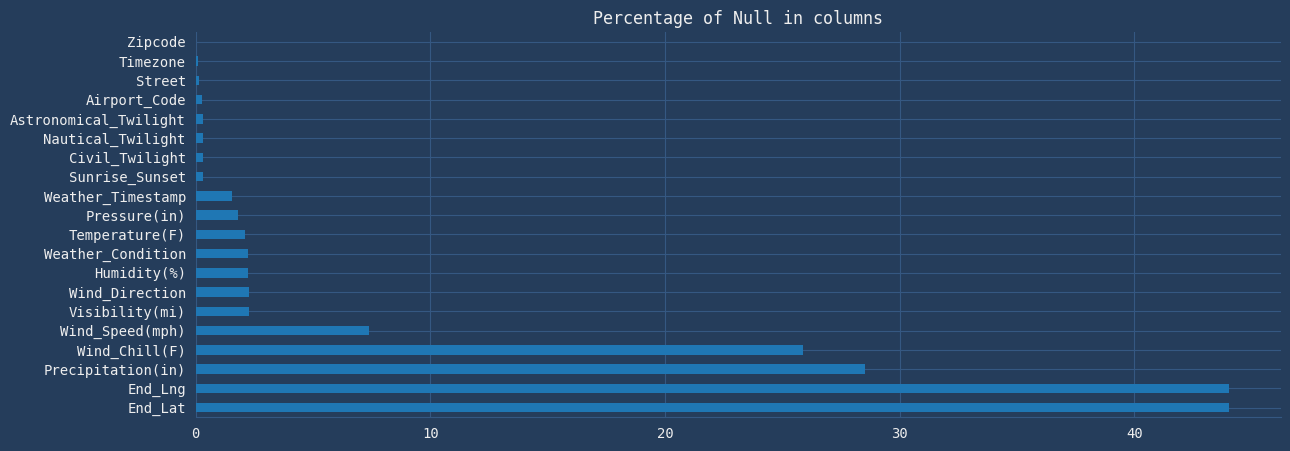

In [33]:
ax = percent.plot(kind="barh", figsize=(14, 5))
plt.title("Percentage of Null in columns")

# Set the left spine color and width
ax.spines["left"].set_color("white")
ax.spines["left"].set_linewidth(1.5)

plt.savefig("./Images/NullColumns")
plt.show()

## Exploratory Data Analysis

Columns to start with :    
- City
- Start_Time , End_Time
- Start_Lat , End_Lat
- Temperature(F)
- Weather

### Time Analysis 

```Start_Time```
```End_Time```
```Timezone```
```Sunrise_Sunset```
```Civil_Twilight```
```Nautical_Twilight```
```Astronomical_Twilight```

In [28]:
# Define the transformations as functions
def extract_datetime_features(df):

    # duration_parts = [(86400, 7), (3600, 24), (60, 60), (1, 60)]
    # exp = "zip_with(parts, array('d', 'hr', 'min', 'sec'), (x, y) -> IF(x > 0, concat(x, y), null))"

    # df.withColumn("parts", array(*[(floor(col("Seconds") / d)) % m for d, m in duration_parts]))\
    #   .withColumn("duration", array_join(expr(exp), ", "))\
    #   .drop("parts")\
    #   .show(truncate=False)

    # df = df.withColumn(
    #     "Start_Time", F.to_timestamp("Start_Time", "yyyy-MM-dd HH:mm:ss.SSS")
    # )
    # df = df.withColumn(
    #     "End_Time", F.to_timestamp("End_Time", "yyyy-MM-dd HH:mm:ss.SSS")
    # )
    df = df.withColumn("Hour", F.hour("Start_Time"))
    df = df.withColumn("Day", F.dayofmonth("Start_Time"))
    df = df.withColumn("Month", F.month("Start_Time"))
    df = df.withColumn("Year", F.year("Start_Time"))
    df = df.withColumn("Week_Day", F.date_format("Start_Time", "EEEE"))
    df = df.withColumn("Week", F.weekofyear("Start_Time"))
    df = df.withColumn("Day_Of_Week", F.dayofweek("Start_Time"))
    df = df.withColumn("Day_Of_Year", F.dayofyear("Start_Time"))
    
    df = df.withColumn("Duration_Days",F.datediff("End_Time","Start_Time"))
    df = df.withColumn(
        "Duration",
        F.date_format(
            F.to_timestamp(
                F.col("End_Time").cast("long") - F.col("Start_Time").cast("long")
            ),
            "HH:mm:ss"
        )
    )
    df = df.withColumn("Duration_Minutes", F.minute("Duration"))
    df = df.withColumn("Duration_Hours", F.hour("Duration"))
    df = df.withColumn("Outlier_Flag",F.when(F.col("Duration_Days") > 1, 'Bad').otherwise('Good') )

    return df


def count_accidents_per_year(df):
    year_df = (
        df.filter(F.col("Outlier_Flag") == "Good")
        .groupBy("Year")
        .count()
        .orderBy("count")
        .selectExpr("Year", "count as Cases")
        .toPandas()
    )
    return year_df


def count_accidents_per_week(df):
    week_df = (
        df.filter(F.col("Outlier_Flag") == "Good")
        .groupBy("Week")
        .count()
        .orderBy("Week")
        .selectExpr("Week", "count as Cases")
        .toPandas()
    )
    return week_df


def count_accidents_per_hour(df):
    hour_df = (
        df.filter(F.col("Outlier_Flag") == "Good")
        .groupBy("Hour")
        .count()
        .orderBy("Hour")
        .selectExpr("Hour", "count as Cases")
        .toPandas()
    )
    return hour_df


def count_accidents_per_duration(df):
    duration_df = (
        df.filter(F.col("Outlier_Flag") == "Good")
        .groupBy('Duration')
        .count()
        .orderBy('Duration')
        .selectExpr('Duration', 'count as Cases')
        .toPandas()
    )

    # Calculate the quantiles for grouping
    quantiles = duration_df['Cases'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).tolist()

    # Assign categories based on quantiles
    duration_df['Category'] = pd.cut(duration_df['Cases'], bins=quantiles, labels=['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5'])

    return duration_df


def count_accidents_per_duration(df):
    duration_df = (
        df.filter(F.col("Outlier_Flag") == "Good")
        .groupBy("Duration")
        .count()
        .orderBy("Duration")
        .selectExpr("Duration", "count as Cases")
        .toPandas()
    )
    return duration_df


def count_accidents_per_duration_minutes(df):
    duration_minutes_df = (
        df.filter(F.col("Outlier_Flag") == "Good")
        .groupBy("Duration_Minutes")
        .count()
        .orderBy("Duration_Minutes")
        .selectExpr("Duration_Minutes", "count as Cases")
        .toPandas()
    )
    return duration_minutes_df


def count_accidents_per_duration_hours(df):
    duration_hours_df = (
        df.filter(F.col("Outlier_Flag") == "Good")
        .groupBy("Duration_Hours")
        .count()
        .orderBy("Duration_Hours")
        .selectExpr("Duration_Hours", "count as Cases")
        .toPandas()
    )
    return duration_hours_df


def find_hour_with_max_accidents(hour_df):
    window_spec = Window.orderBy(F.col("Cases").desc())
    morning_df = hour_df[(hour_df["Hour"] >= 0) & (hour_df["Hour"] < 12)]
    morning_df["row_num"] = morning_df["Cases"].rank(method="first", ascending=False)
    night_df = hour_df[(hour_df["Hour"] >= 12) & (hour_df["Hour"] <= 23)]
    night_df["row_num"] = night_df["Cases"].rank(method="first", ascending=False)
    max_H_Morning = morning_df[morning_df["row_num"] == 1]["Hour"].values[0]
    max_H_Night = night_df[night_df["row_num"] == 1]["Hour"].values[0]

    return max_H_Morning, max_H_Night

def find_max_duration_hour_with_max_accidents(duration_hours_df):
    duration_hours_df["row_num"] = duration_hours_df["Cases"].rank(method="first", ascending=False)
    max_duration_hour = duration_hours_df[duration_hours_df["row_num"] == 1]["Duration_Hours"].values[0]
    return max_duration_hour
    
def find_max_accidents_by_weekday(df):
    weekday_df = (
        df.filter(F.col("Outlier_Flag") == "Good")
        .groupBy("Week_Day")
        .count()
        .toPandas()
        .set_index("Week_Day")
        .reindex(
            index=[
                "Monday",
                "Tuesday",
                "Wednesday",
                "Thursday",
                "Friday",
                "Saturday",
                "Sunday",
            ]
        )
        .rename(columns={"count": "Cases"})
    )
    max_Day = weekday_df["Cases"].idxmax()
    weekday_df = weekday_df.reset_index()
    return max_Day, weekday_df


def count_accidents_by_month(df):
    df_months = (
        df.filter(F.col("Outlier_Flag") == "Good")
        .groupBy("Month")
        .count()
        .orderBy("Month")
        .toPandas()
        .set_index("Month")
        .rename(
            index={
                1: "Jan",
                2: "Feb",
                3: "Mar",
                4: "Apr",
                5: "May",
                6: "Jun",
                7: "Jul",
                8: "Aug",
                9: "Sep",
                10: "Oct",
                11: "Nov",
                12: "Dec",
            },
            columns={"count": "Cases"},
        )
    )
    max_Month = df_months["Cases"].idxmax()
    df_months = df_months.reset_index()
    return df_months, max_Month


# Apply the transformations using a pipeline
df = extract_datetime_features(df)

year_df = count_accidents_per_year(df)
week_df = count_accidents_per_week(df)
hour_df = count_accidents_per_hour(df)

duration_df = count_accidents_per_duration(df)
duration_minutes_df = count_accidents_per_duration_minutes(df)
duration_hours_df = count_accidents_per_duration_hours(df)

max_duration_hour = find_max_duration_hour_with_max_accidents(duration_hours_df)

max_H_Morning, max_H_Night = find_hour_with_max_accidents(hour_df)
max_Day, weekday_df = find_max_accidents_by_weekday(df)
df_months, max_Month = count_accidents_by_month(df)

In [6]:
df.select("ID",
          "Source","Temperature(F)",
    "Start_Time",
    "End_Time",
    "Timezone",
    "Duration_Days",
    "Duration"
).orderBy(F.desc("Duration_Days")).show(50)

+---------+-------+--------------+-------------------+-------------------+----------+-------------+--------+
|       ID| Source|Temperature(F)|         Start_Time|           End_Time|  Timezone|Duration_Days|Duration|
+---------+-------+--------------+-------------------+-------------------+----------+-------------+--------+
|A-5053641|Source1|          66.2|2016-10-21 07:26:00|2022-02-25 17:45:00|US/Eastern|         1953|13:19:00|
|A-4810425|Source1|          66.2|2016-10-21 07:26:00|2022-02-25 17:45:00|US/Eastern|         1953|13:19:00|
|A-5286907|Source1|          41.0|2018-04-19 09:24:00|2022-07-20 08:44:30|US/Eastern|         1553|01:20:30|
|A-4014778|Source1|          41.0|2018-04-19 09:24:00|2022-07-20 09:59:32|US/Eastern|         1553|02:35:32|
|A-5292352|Source1|          41.0|2018-04-19 09:24:00|2022-07-20 09:34:38|US/Eastern|         1553|02:10:38|
|A-4574829|Source1|          41.0|2018-04-19 09:24:00|2022-07-20 09:59:32|US/Eastern|         1553|02:35:32|
|A-5399002|Source1|

In [7]:
def count_accidents_per_duration(df):
    duration_df = (
        df.groupBy("Duration_Days")
        .count()
        .orderBy("Duration_Days")
        .selectExpr("Duration_Days", "count as Cases")
        .toPandas().set_index("Duration_Days")
    )
    return duration_df
duration_df = count_accidents_per_duration(df)

2

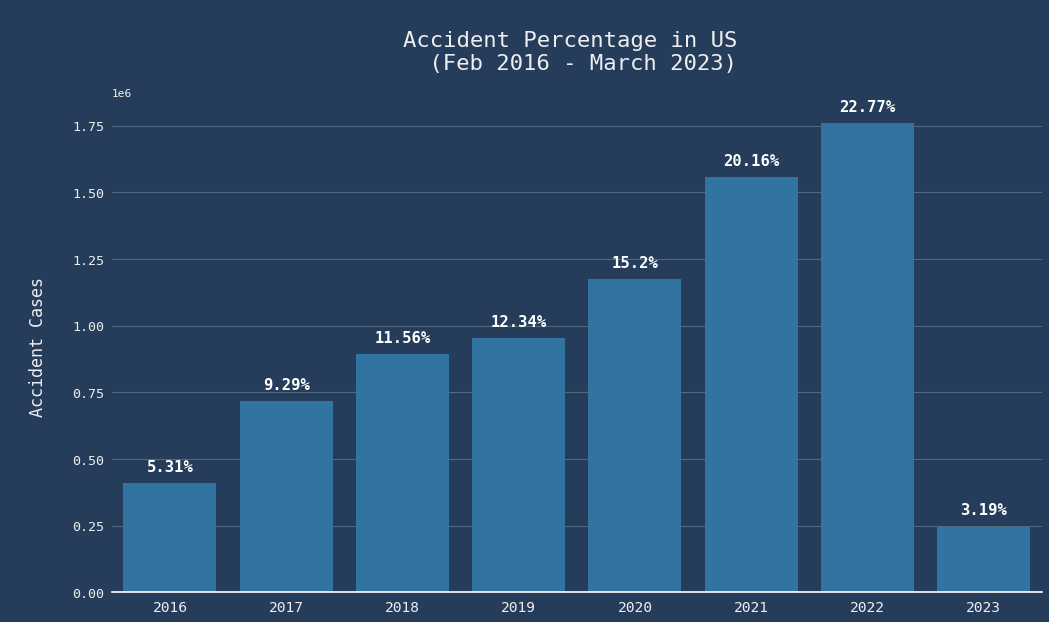

In [11]:
# Plot the bar chart
fig, ax = plt.subplots(figsize=(15, 8), dpi=80)
ax = sns.barplot(data=year_df, x="Year", y="Cases")

# Calculate and display the percentage of each bar
total = df.count()
# for i in ax.patches:
#     ax.text(
#         i.get_x() + 0.2,
#         i.get_height() - 50000,
#         f"{round((i.get_height() / total) * 100, 2)}%",
#         fontsize=15,
#         weight='bold',
#         color='white')
labels = [
    str(round((v / total) * 100, 2)) + "" + "%" if v else ""
    for v in ax.containers[0].datavalues.astype(int)
]
ax.bar_label(
    container=ax.containers[0],
    labels=labels,
    padding=8,
    weight="bold",
    color="white",
    fontsize=14,
)

plt.title("\nAccident Percentage in US \n (Feb 2016 - March 2023)\n", size=20)
plt.ylabel("\nAccident Cases\n", fontsize=15)
ax.set(xlabel=None)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

ax.spines["bottom"].set_color("white")
ax.spines["bottom"].set_linewidth(1.5)
side = ax.spines["bottom"]
side.set_visible(True)
ax.grid(color="#b2d6c7", linewidth=1, axis="y", alpha=0.3)
# MA = mpatches.Patch(color='#2ee88e', label='Year with Maximum\n no. of Road Accidents')
# MI = mpatches.Patch(color='#9a90e8', label='Year with Minimum\n no. of Road Accidents')
# ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, labelcolor=['#2ee88e', '#9a90e8'], edgecolor='white')
plt.savefig("./Images/AccidentsPercentageForYear")
plt.show()

In [42]:
def count_accidents_per_duration(df):
    duration_df = (
        df.groupBy("Duration")
        .count()
        .orderBy("Duration")
        .selectExpr("Duration", "count as Cases")
        .toPandas()
    )

    # Calculate the quantiles for grouping
    quantiles = duration_df["Cases"].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).tolist()

    # Assign categories based on quantiles
    duration_df["Category"] = pd.cut(
        duration_df["Cases"],
        bins=quantiles,
        labels=["Category 1", "Category 2", "Category 3", "Category 4", "Category 5"],
    )

    return duration_df

In [43]:
quantiles = (
    duration_hours_df["Duration_Hours"].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).tolist()
)
quantiles

NameError: name 'duration_hours_df' is not defined

In [23]:
duration_hours_df.sort_values(by="Cases")

Duration_Hours    Cases
646          1145.0        1
467           657.0        1
861          2087.0        1
469           661.0        1
470           663.0        1
..              ...      ...
3               3.0   416026
6               6.0   424605
2               2.0  1479208
0               0.0  1770958
1               1.0  3131825

[1293 rows x 2 columns]

<Axes: >

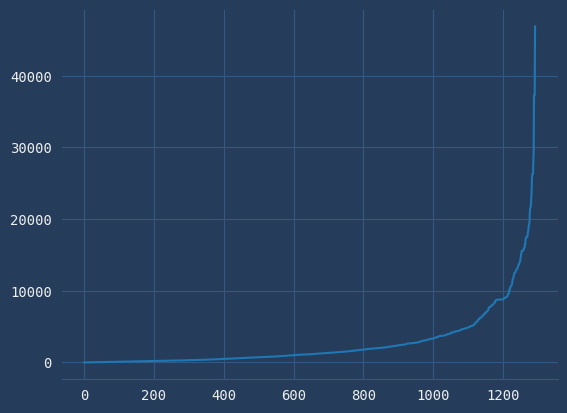

In [24]:
duration_hours_df["Duration_Hours"].plot()

In [44]:
quantiles = duration_df["Duration"].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).tolist()
quantiles

NameError: name 'duration_df' is not defined

In [16]:
duration_df.describe()

Duration          Cases
count  7.403800e+04   74038.000000
mean   5.511779e+03     104.384154
std    5.528060e+04    1777.170786
min    1.216667e+00       1.000000
25%    3.148375e+02       2.000000
50%    6.338750e+02       4.000000
75%    1.012304e+03      15.000000
max    2.812939e+06  369307.000000

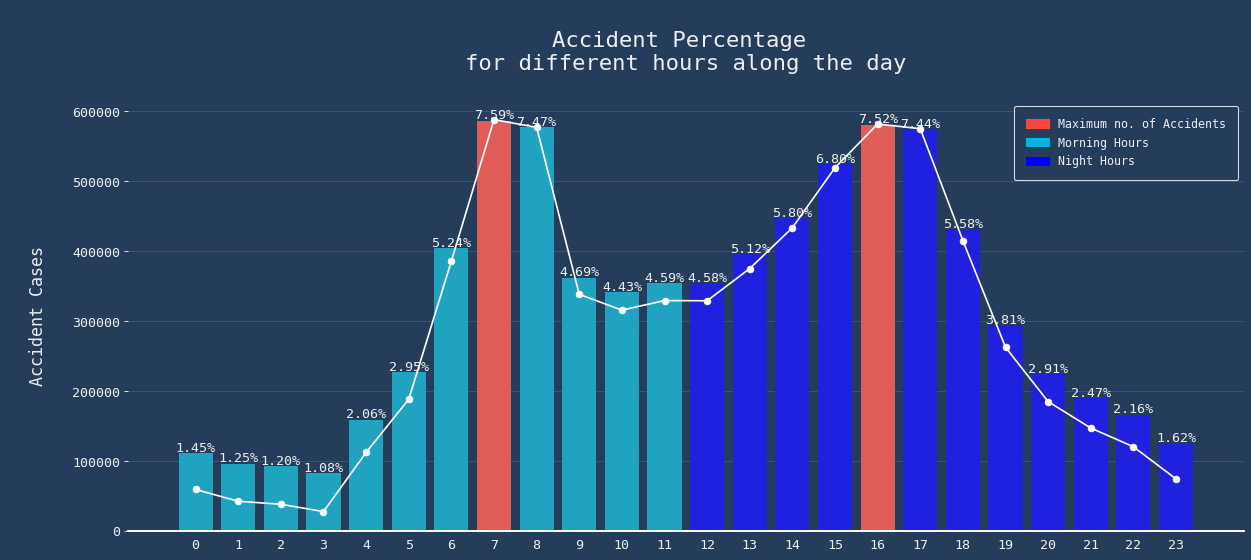

In [12]:
fig, ax = plt.subplots(figsize=(18, 7), dpi=80)

clrs = [
    f_COLOR
    if (i == max_H_Morning or i == max_H_Night)
    else s_COLOR
    if i < 12
    else "blue"
    for i in hour_df.index
]

ax = sns.barplot(
    y=hour_df["Cases"], x=hour_df["Hour"], hue=hour_df["Hour"], palette=clrs
)

ax1 = ax.twinx()
total = df.count()
sns.lineplot(data=hour_df, marker="o", x="Hour", y="Cases", color="white", alpha=1)


# Calculate the percentage of each bar relative to the total
percentages = hour_df["Cases"] / total * 100

# Show the percentage on top of each bar
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if x != 0:
        ax.annotate(
            f"{percentages[i]:.2f}%",
            (x + width / 2, y + height + 2000),
            ha="center",
            fontsize=12,
        )

# labels = [f'{np.round((v.datavalues.astype(int) / total )* 100,2)}%' if v else '' for v in ax.containers]
# ax.bar_label(container=ax.containers,labels = labels, padding=8, weight='bold',color='white', fontsize=12)

# for i, p in enumerate(ax.patches):
#     ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 2000, f'{round((p.get_height() / total) * 100, 2)}%',
#             ha='center', va='bottom', fontsize=12, color='white')

plt.title("\nAccident Percentage \nfor different hours along the day\n", size=20)

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel("\nHours\n", fontsize=15)
ax.set_ylabel("\nAccident Cases\n", fontsize=15)
ax.set(xlabel=None)

for spine in ax.spines.values():
    spine.set_color("white")
    spine.set_linewidth(1.5)
for spine in ax1.spines.values():
    spine.set_color("white")
    spine.set_linewidth(1.5)

ax.set_axisbelow(True)
# ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
ax.tick_params(axis="both", which="major", labelsize=12)

MA = mpatches.Patch(color=f_COLOR, label="Maximum no. of Accidents")
MO = mpatches.Patch(color=s_COLOR, label="Morning Hours")
NI = mpatches.Patch(color="blue", label="Night Hours")

ax.legend(
    handles=[MA, MO, NI],
    prop={"size": 10.5},
    loc="upper right",
    borderpad=1,
    edgecolor="white",
)
plt.savefig("./Images/AccidentsPercentageForEachHour")
plt.show()

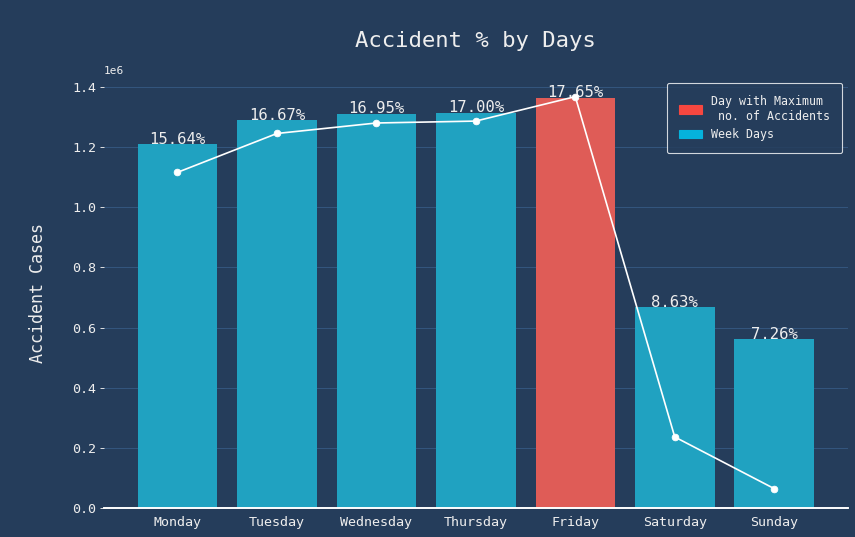

In [15]:
fig, ax = plt.subplots(figsize=(12, 7), dpi=80)

clrs = [f_COLOR if x == max_Day else s_COLOR for x in weekday_df["Week_Day"]]

ax = sns.barplot(
    y=weekday_df["Cases"], x=weekday_df.index, hue=weekday_df.index, palette=clrs
)

ax1 = ax.twinx()
total = df.count()
percentages = weekday_df["Cases"] / total * 100

sns.lineplot(
    data=weekday_df, marker="o", x=weekday_df["Week_Day"], y="Cases", color="white", alpha=1
)


# Show the percentage on top of each bar
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if x != 0:
        ax.annotate(
            f"{percentages[i]:.2f}%",
            (x + width / 2, y + height + 2000),
            ha="center",
            fontsize=14,
        )

plt.title("\nAccident % by Days\n", size=20)

ax1.axes.yaxis.set_visible(False)
ax.set_ylabel("\nAccident Cases\n", fontsize=15)
ax.set(xlabel=None)

for i in ["bottom", "top", "left", "right"]:
    ax.spines[i].set_color("white")
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color("white")
    ax1.spines[i].set_linewidth(1.5)

ax.set_axisbelow(True)
# ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
ax.tick_params(axis="both", which="major", labelsize=12)

MA = mpatches.Patch(color=f_COLOR, label="Day with Maximum\n no. of Accidents")
NI = mpatches.Patch(color=s_COLOR, label="Week Days")

ax.legend(
    handles=[MA, NI], prop={"size": 10.5}, loc="best", borderpad=1, edgecolor="white"
)
plt.savefig("./Images/AccidentsPercentageForEachDayOfWeek")
plt.show()

In [18]:
custom_palette = sns.color_palette("Paired", 8)
custom_palette

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0)]

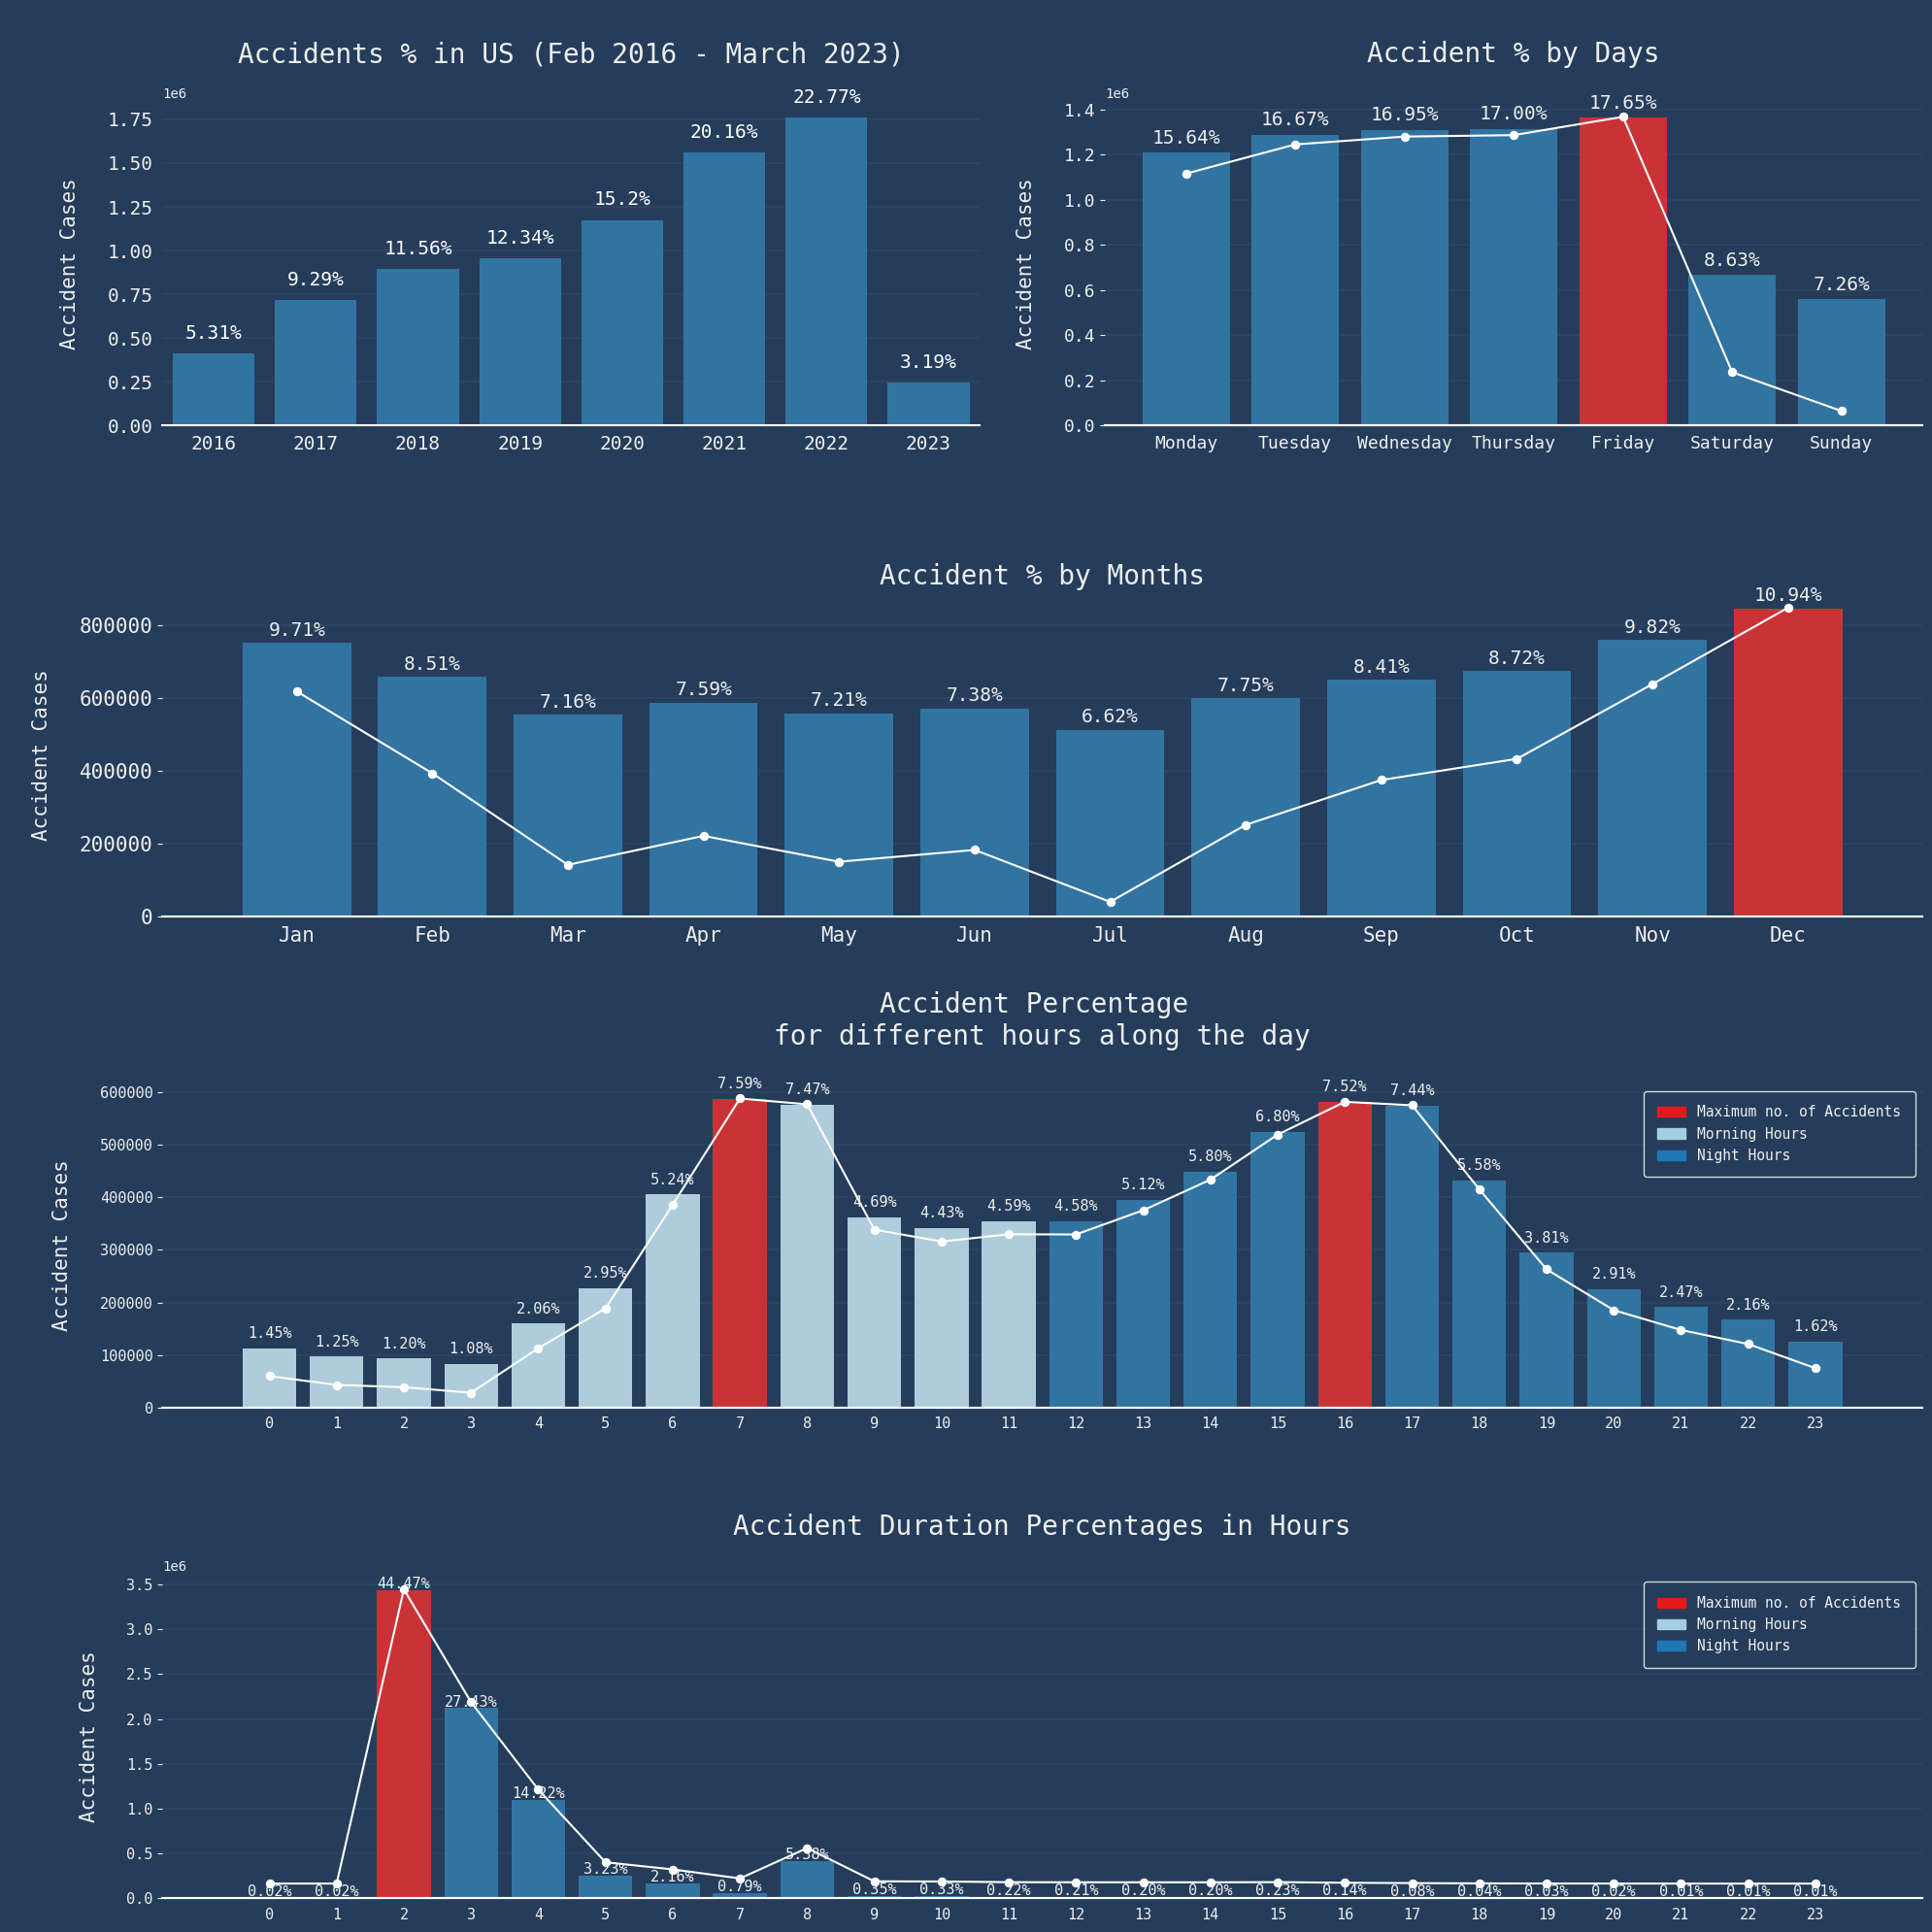

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(20, 20))

# Plot 1: Accidents Percentage for Year
ax1 = plt.subplot2grid((4, 4), (0, 0), colspan=2)
ax1 = sns.barplot(data=year_df, x="Year", y="Cases", color=custom_palette[1], ax=ax1)
# Calculate and display the percentage of each bar
total = df.count()
labels = [
    str(round((v / total) * 100, 2)) + "" + "%" if v else ""
    for v in ax1.containers[0].datavalues.astype(int)
]
ax1.bar_label(
    container=ax1.containers[0], labels=labels, padding=8, color="white", fontsize=14
)

ax1.set_title("\nAccidents % in US (Feb 2016 - March 2023)\n", size=20)
ax1.set_ylabel("\nAccident Cases\n", fontsize=15)
ax1.set(xlabel=None)
ax1.tick_params(axis="both", which="major", labelsize=14)
ax1.spines["bottom"].set_color("white")
ax1.spines["bottom"].set_linewidth(1.5)
ax1.grid(color="#b2d6c7", linewidth=0.25, axis="y", alpha=0.3)

# Plot 2: Accidents Percentage for Each Day of Week
ax2 = plt.subplot2grid((4, 4), (0, 2), colspan=2)
clrs = [
    custom_palette[5] if x == max_Day else custom_palette[1]
    for x in weekday_df["Week_Day"]
]

ax2 = sns.barplot(
    data=weekday_df, x="Week_Day", y="Cases", hue="Week_Day", palette=clrs, ax=ax2
)
total = df.count()
percentages = weekday_df["Cases"] / total * 100

# Show the percentage on top of each bar
for i, p in enumerate(ax2.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if x != 0:
        ax2.annotate(
            f"{percentages.iloc[i]:.2f}%",
            (x + width / 2, y + height + 40000),
            ha="center",
            fontsize=14,
        )

ax2_1 = ax2.twinx()

sns.lineplot(
    data=weekday_df, marker="o", x=weekday_df.index, y="Cases", color="white", alpha=1
)

# # # Show the percentage on top of each bar
# # for i, p in enumerate(ax2.patches):
# #     width, height = p.get_width(), p.get_height()
# #     x, y = p.get_xy()
# #     if x!= 0 :
# #         ax2.annotate(f'{percentages.iloc[i]:.2f}%', (x + width / 2, y + height + 2000), ha='center', fontsize=12)

ax2.set_title("\nAccident % by Days\n", size=20)
ax2.set_ylabel("\nAccident Cases\n", fontsize=15)
ax2.set(xlabel=None)
ax2_1.axes.yaxis.set_visible(False)
for i in ["bottom", "top", "left", "right"]:
    ax2.spines[i].set_color("white")
    ax2.spines[i].set_linewidth(1.5)
    ax2_1.spines[i].set_color("white")
    ax2_1.spines[i].set_linewidth(1.5)

ax2.set_axisbelow(True)
ax2.grid(color="#b2d6c7", linewidth=0.25, axis="y", alpha=0.3)
ax2.tick_params(axis="both", which="major", labelsize=13)


# Plot 3: Accidents Percentage for Each Hour
ax3 = plt.subplot2grid((4, 4), (2, 0), colspan=4)

clrs = [
    custom_palette[5]
    if (i == max_H_Morning or i == max_H_Night)
    else custom_palette[0]
    if i < 12
    else custom_palette[1]
    for i in hour_df.index
]
ax3 = sns.barplot(
    y=hour_df["Cases"], x=hour_df["Hour"], hue=hour_df["Hour"], palette=clrs, ax=ax3
)

ax3_1 = ax3.twinx()
sns.lineplot(data=hour_df, marker="o", x="Hour", y="Cases", color="white", alpha=1)
percentages = hour_df["Cases"] / total * 100

# Show the percentage on top of each bar
for i, p in enumerate(ax3.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if x != 0:
        ax3.annotate(
            f"{percentages.iloc[i]:.2f}%",
            (x + width / 2, y + height + 20000),
            ha="center",
            fontsize=11,
        )

ax3_1.axes.yaxis.set_visible(False)
ax3.set_title("\nAccident Percentage \nfor different hours along the day\n", size=20)
ax3.set_xlabel("\nHours\n", fontsize=15)
ax3.set_ylabel("\nAccident Cases\n", fontsize=15)
ax3.set(xlabel=None)

for spine in ax3.spines.values():
    spine.set_color("white")
    spine.set_linewidth(1.5)
for spine in ax3_1.spines.values():
    spine.set_color("white")
    spine.set_linewidth(1.5)

ax3.set_axisbelow(True)
ax3.grid(color="#b2d6c7", linewidth=0.25, axis="y", alpha=0.3)
ax3.tick_params(axis="both", which="major", labelsize=11)

MA = mpatches.Patch(color=custom_palette[5], label="Maximum no. of Accidents")
MO = mpatches.Patch(color=custom_palette[0], label="Morning Hours")
NI = mpatches.Patch(color=custom_palette[1], label="Night Hours")

ax3.legend(
    handles=[MA, MO, NI],
    prop={"size": 10.5},
    loc="upper right",
    borderpad=1,
    edgecolor="white",
)

# Plot 4: Accidents Percentage for Each Month
ax4 = plt.subplot2grid((4, 4), (1, 0), colspan=4)
clrs = [
    custom_palette[5] if x == max_Month else custom_palette[1]
    for x in df_months["Month"]
]
ax4 = sns.barplot(
    data=df_months, y="Cases", x="Month", hue="Month", palette=clrs, ax=ax4
)

total = df.count()
percentages = df_months["Cases"] / total * 100

ax4_1 = ax4.twinx()
sns.lineplot(
    data=df_months, marker="o", x=df_months.index, y="Cases", color="white", alpha=1
)

# Show the percentage on top of each bar
for i, p in enumerate(ax4.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if x != 0:
        ax4.annotate(
            f"{percentages.iloc[i]:.2f}%",
            (x + width / 2, y + height + 20000),
            ha="center",
            fontsize=14,
        )

ax4.set_title("Accident % by Months", size=20)
ax4.set_ylabel("\nAccident Cases\n", fontsize=15)
ax4.set(xlabel=None)
ax4_1.axes.yaxis.set_visible(False)
for i in ["bottom", "top", "left", "right"]:
    ax4.spines[i].set_color("white")
    ax4.spines[i].set_linewidth(1.5)
    ax4_1.spines[i].set_color("white")
    ax4_1.spines[i].set_linewidth(1.5)

ax4.set_axisbelow(True)
ax4.grid(color="#b2d6c7", linewidth=0.25, axis="y", alpha=0.3)
ax4.tick_params(axis="both", which="major", labelsize=15)

# Plot 5: Accidents Percentage for Each Hour Duration
ax5 = plt.subplot2grid((4, 4), (3, 0), colspan=4)

clrs = [
    custom_palette[5]
    if i == max_duration_hour
    else custom_palette[1]
    for i in duration_hours_df.index
]
ax5 = sns.barplot(
    y=duration_hours_df["Cases"], x=duration_hours_df["Duration_Hours"], hue=duration_hours_df["Duration_Hours"], palette=clrs, ax=ax5
)

ax5_1 = ax5.twinx()
sns.lineplot(data=duration_hours_df, marker="o", x="Duration_Hours", y="Cases", color="white", alpha=1)
percentages = duration_hours_df["Cases"] / total * 100

# Show the percentage on top of each bar
for i, p in enumerate(ax5.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if x != 0:
        ax5.annotate(
            f"{percentages.iloc[i]:.2f}%",
            (x + width / 2, y + height + 20000),
            ha="center",
            fontsize=11,
        )

ax5_1.axes.yaxis.set_visible(False)
ax5.set_title("\nAccident Duration Percentages in Hours\n", size=20)
ax5.set_xlabel("\nHours\n", fontsize=15)
ax5.set_ylabel("\nAccident Cases\n", fontsize=15)
ax5.set(xlabel=None)

for spine in ax5.spines.values():
    spine.set_color("white")
    spine.set_linewidth(1.5)
for spine in ax5_1.spines.values():
    spine.set_color("white")
    spine.set_linewidth(1.5)

ax5.set_axisbelow(True)
ax5.grid(color="#b2d6c7", linewidth=0.25, axis="y", alpha=0.3)
ax5.tick_params(axis="both", which="major", labelsize=11)

MA = mpatches.Patch(color=custom_palette[5], label="Maximum no. of Accidents")
MO = mpatches.Patch(color=custom_palette[0], label="Morning Hours")
NI = mpatches.Patch(color=custom_palette[1], label="Night Hours")

ax5.legend(
    handles=[MA, MO, NI],
    prop={"size": 10.5},
    loc="upper right",
    borderpad=1,
    edgecolor="white",
)


# Adjust the spacing between subplots
fig.tight_layout()

# Save and display the combined plot
plt.savefig("./Images/CombinedPlots_Date")
plt.show()

In [50]:
import plotly.express as px
import plotly.io as pio

In [51]:
def plot_date_accident(df, y, title):
    fig = px.line(
        data_frame=df,
        x=df.index,
        y="Cases",
        labels={"Cases": y, "x": "Weeks"},
        title=title,
    )

    pio.write_image(fig, "./Images/line" + title + ".png", format="png")
    fig.update_traces(line_color="deeppink", line_width=3)

    return fig

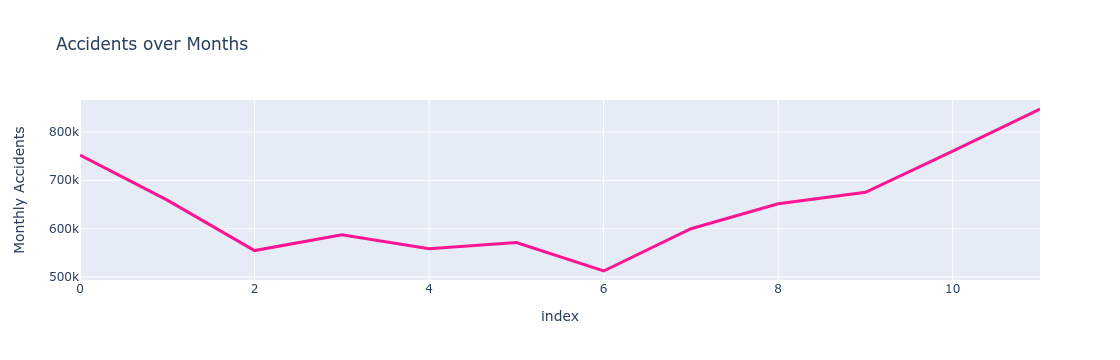

In [159]:
plot_date_accident(df_months, "Monthly Accidents", "Accidents over Months")

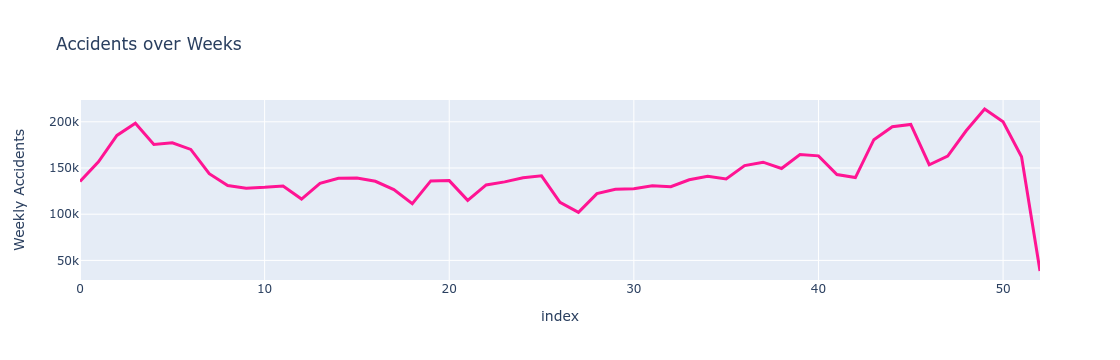

In [160]:
plot_date_accident(week_df, "Weekly Accidents", "Accidents over Weeks")

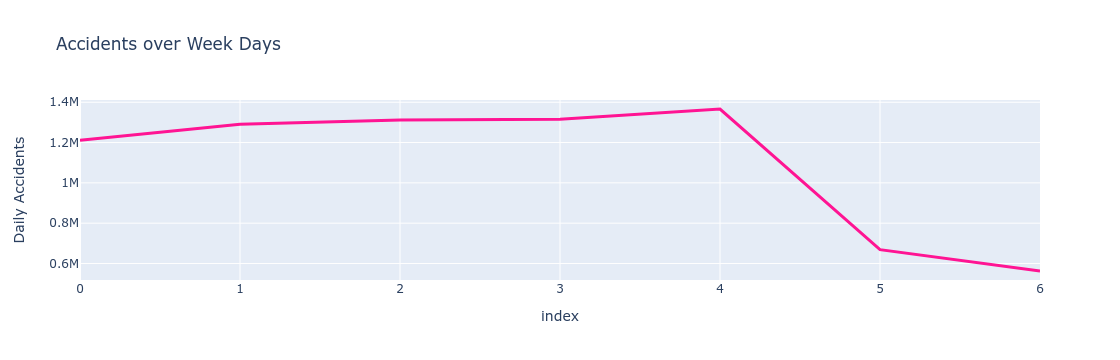

In [161]:
plot_date_accident(weekday_df, "Daily Accidents", "Accidents over Week Days")

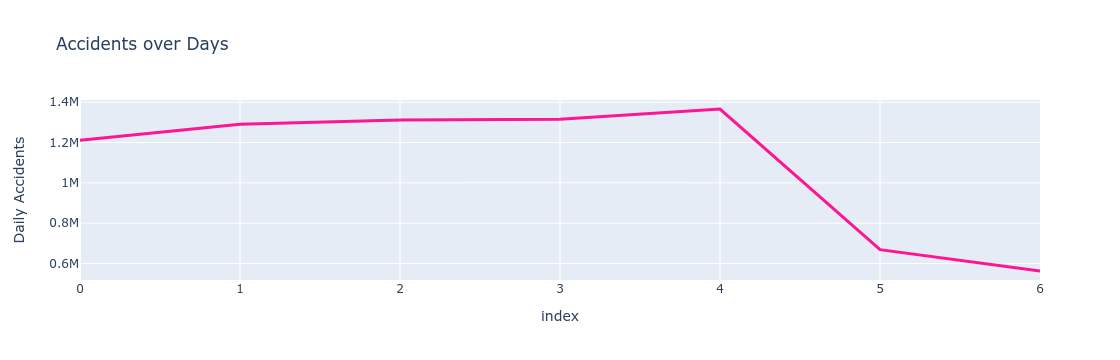

In [163]:
plot_date_accident(,'Daily Accidents',"Accidents over Days")

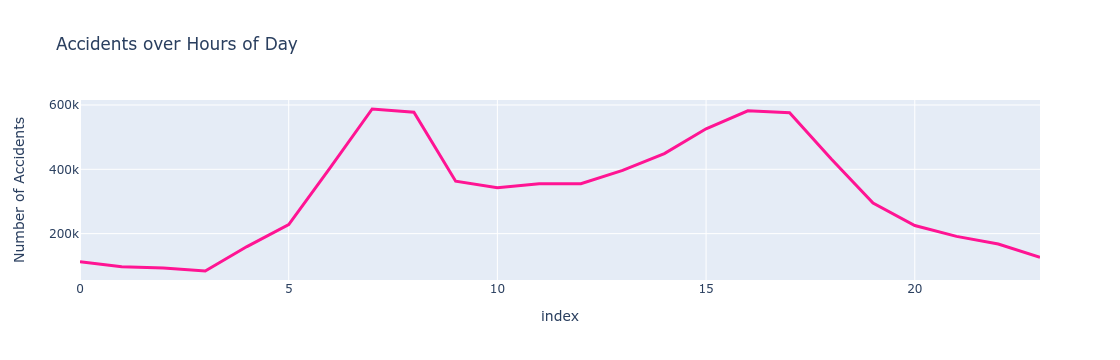

In [164]:
plot_date_accident(hour_df, "Number of Accidents", "Accidents over Hours of Day")

In [169]:
# Convert 'ID' column to string type
df = df.withColumn("ID", F.col("ID").cast("string"))

# Extract the last two characters from 'ID' column
df = df.withColumn("ID", F.substring("ID", -2, 2))

# Convert 'ID' column to float type
df = df.withColumn("ID", F.col("ID").cast("float"))

# Filter and group by week for each year, and count the accidents
weekly_Accidents_2016 = (
    df.filter(df.Year == 2016)
    .drop("Start_Time")
    .groupBy("Week")
    .count()
    .toPandas()
    .set_index("Week")
    .sort_index()
)
weekly_Accidents_2017 = (
    df.filter(df.Year == 2017)
    .drop("Start_Time")
    .groupBy("Week")
    .count()
    .toPandas()
    .set_index("Week")
    .sort_index()
)
weekly_Accidents_2018 = (
    df.filter(df.Year == 2018)
    .drop("Start_Time")
    .groupBy("Week")
    .count()
    .toPandas()
    .set_index("Week")
    .sort_index()
)
weekly_Accidents_2019 = (
    df.filter(df.Year == 2019)
    .drop("Start_Time")
    .groupBy("Week")
    .count()
    .toPandas()
    .set_index("Week")
    .sort_index()
)
weekly_Accidents_2020 = (
    df.filter(df.Year == 2020)
    .drop("Start_Time")
    .groupBy("Week")
    .count()
    .toPandas()
    .set_index("Week")
    .sort_index()
)
weekly_Accidents_2021 = (
    df.filter(df.Year == 2021)
    .drop("Start_Time")
    .groupBy("Week")
    .count()
    .toPandas()
    .set_index("Week")
    .sort_index()
)
weekly_Accidents_2022 = (
    df.filter(df.Year == 2022)
    .drop("Start_Time")
    .groupBy("Week")
    .count()
    .toPandas()
    .set_index("Week")
    .sort_index()
)
weekly_Accidents_2023 = (
    df.filter(df.Year == 2023)
    .drop("Start_Time")
    .groupBy("Week")
    .count()
    .toPandas()
    .set_index("Week")
    .sort_index()
)

In [170]:
# df['ID'] = pd.Series(df['ID'], dtype="string")
# df['ID'] = df['ID'].apply(lambda x : x[2:])
# df['ID'] = df['ID'].astype('float')
# weekly_Accidents_2016 = df[df.Year==2016].drop(columns=['Start_Time'])['ID'].groupby(df['Week']).count()
# weekly_Accidents_2017 = df[df.Year==2017].drop(columns=['Start_Time'])['ID'].groupby(df['Week']).count()
# weekly_Accidents_2018 = df[df.Year==2018].drop(columns=['Start_Time'])['ID'].groupby(df['Week']).count()
# weekly_Accidents_2019 = df[df.Year==2019].drop(columns=['Start_Time'])['ID'].groupby(df['Week']).count()
# weekly_Accidents_2020 = df[df.Year==2020].drop(columns=['Start_Time'])['ID'].groupby(df['Week']).count()
# weekly_Accidents_2021 = df[df.Year==2021].drop(columns=['Start_Time'])['ID'].groupby(df['Week']).count()

In [171]:
custom_palette = sns.color_palette("tab10", 8)
custom_palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745)]

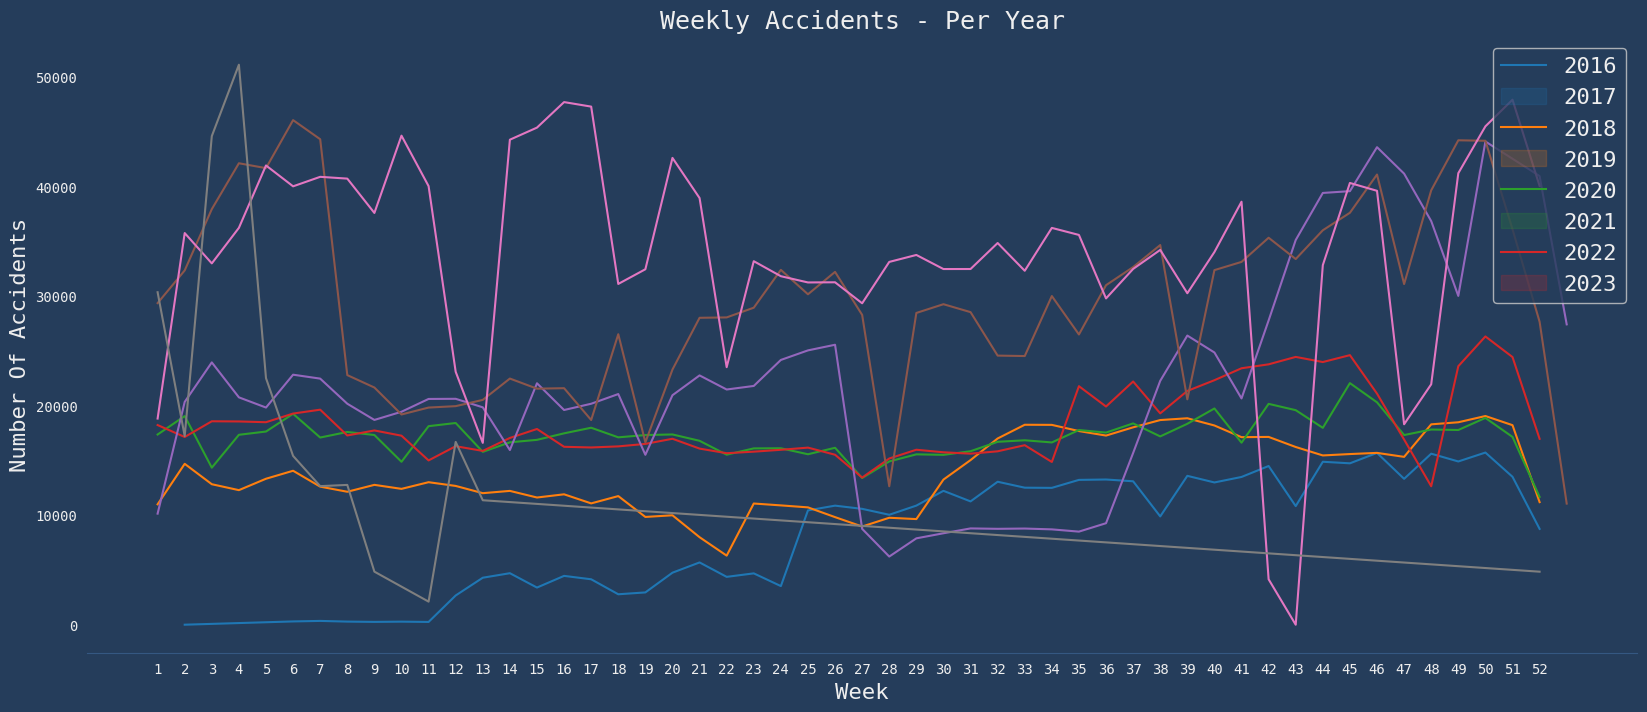

In [179]:
plt.figure(figsize=(20, 8))

sns.lineplot(
    x=weekly_Accidents_2016.index,
    y=weekly_Accidents_2016.values.flatten(),
    color=custom_palette[0],
)
sns.lineplot(
    x=weekly_Accidents_2017.index,
    y=weekly_Accidents_2017.values.flatten(),
    color=custom_palette[1],
)
sns.lineplot(
    x=weekly_Accidents_2018.index,
    y=weekly_Accidents_2018.values.flatten(),
    color=custom_palette[2],
)
sns.lineplot(
    x=weekly_Accidents_2019.index,
    y=weekly_Accidents_2019.values.flatten(),
    color=custom_palette[3],
)
sns.lineplot(
    x=weekly_Accidents_2020.index,
    y=weekly_Accidents_2020.values.flatten(),
    color=custom_palette[4],
)
sns.lineplot(
    x=weekly_Accidents_2021.index,
    y=weekly_Accidents_2021.values.flatten(),
    color=custom_palette[5],
)
sns.lineplot(
    x=weekly_Accidents_2022.index,
    y=weekly_Accidents_2022.values.flatten(),
    color=custom_palette[6],
)
sns.lineplot(
    x=weekly_Accidents_2023.index,
    y=weekly_Accidents_2023.values.flatten(),
    color=custom_palette[7],
)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(
    ["2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"],
    loc="best",
    fontsize=16,
)
plt.title("Weekly Accidents - Per Year", fontsize=18)
plt.ylabel("Number Of Accidents", fontsize=16)
plt.xlabel("Week", fontsize=16)
plt.savefig("./Images/WeeklyAccidentsPerYear")
plt.show()

### Location Analysis

#### Latitude - Longitude

In [ ]:
import folium
from folium import plugins
from folium.plugins import HeatMap

sample_df = df.sample(0.001 * df.count() / df.count())

# Extract latitude and longitude columns
lat_lng = sample_df.select("Start_Lat", "Start_Lng").collect()

# Sample the DataFrame based on percentage
sample_df = df.sample(0.01, seed=12345)

# Extract the locations
locations = sample_df.select("Start_Lat", "Start_Lng").collect()
locationlist = [(row["Start_Lat"], row["Start_Lng"]) for row in locations]

print(len(locationlist))
print(locationlist[4])
# sample_df = df.sample(int(0.01* len(df)))
# locations = sample_df[['Start_Lat', 'Start_Lng']]
locationlist = locations.tolist()
print(len(locationlist))
locationlist[4]
maps = folium.Map()
HeatMap(lat_lng).add_to(maps)
maps

#### City 

In [7]:
cities = (
    df.groupby("City")
    .count()
    .orderBy("count")
    .selectExpr("City", "count as Cases")
    .toPandas()
)
cities.set_index("City", inplace=True)
cities = cities.sort_values(ascending=False, by="Cases")
high_Accidents = cities[cities >= 1000]
low_Accidents = cities[cities < 1000]
total = df.count()

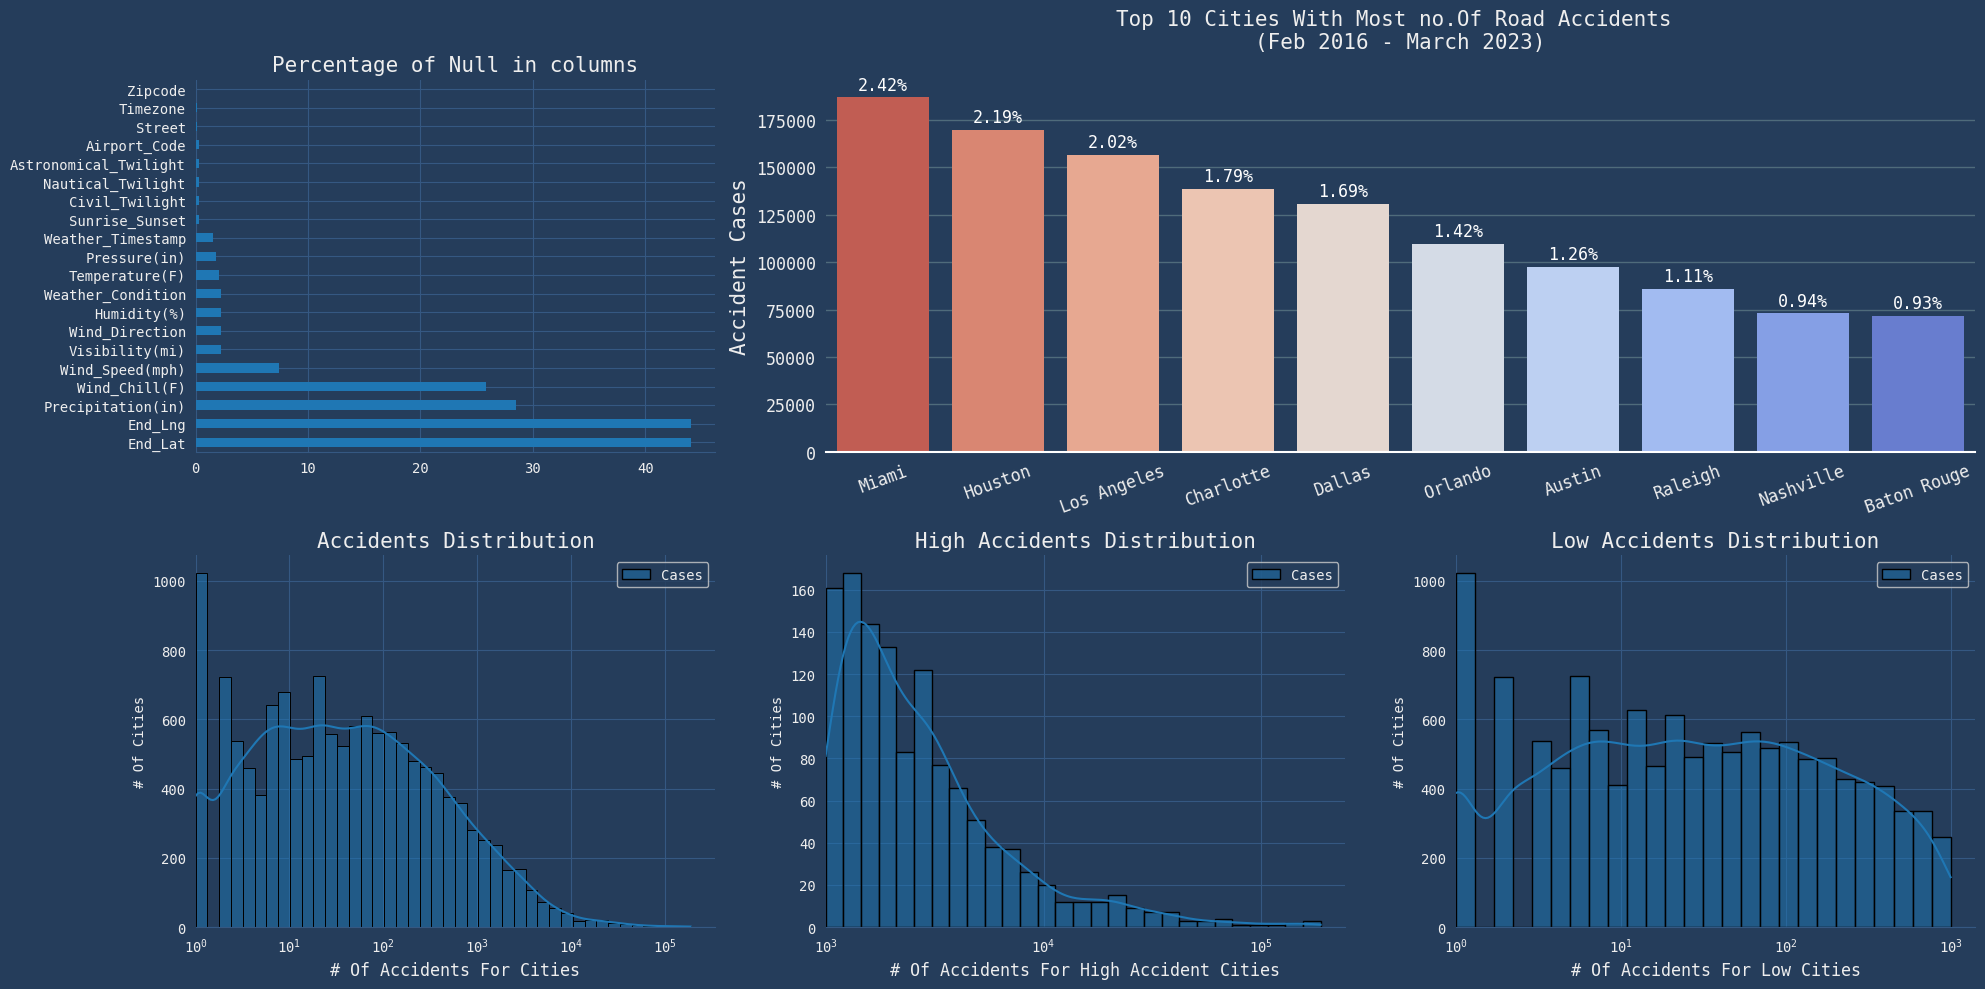

In [8]:
fig = plt.figure(figsize=(20, 10))

# Plot 1: Percentage of Null in columns
ax1 = plt.subplot2grid((2, 3), (0, 0))
ax1 = percent.plot(kind="barh", ax=ax1)
ax1.set_title("Percentage of Null in columns", size=15)
ax1.spines["left"].set_color("white")
ax1.spines["left"].set_linewidth(1.5)

# # Plot 2: Number of Accidents For Each City
ax2 = plt.subplot2grid((2, 3), (0, 1), colspan=2)
ax2 = sns.barplot(
    data=cities.head(10),
    x="City",
    hue="City",
    y="Cases",
    ax=ax2,
    palette=sns.color_palette(palette="coolwarm_r", n_colors=10),
)

for i, p in enumerate(ax2.patches):
    ax2.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 2000,
        f"{round((p.get_height() / total) * 100, 2)}%",
        ha="center",
        va="bottom",
        fontsize=12,
        color="white",
    )

ax2.set_title(
    "Top 10 Cities With Most no.Of Road Accidents \n(Feb 2016 - March 2023)\n", size=15
)
plt.ylabel("Accident Cases", fontsize=15)
ax2.set(xlabel=None)
plt.xticks(rotation=20, fontsize=15)
plt.yticks(fontsize=10)
ax2.tick_params(axis="both", which="major", labelsize=12)
ax2.spines["bottom"].set_color("white")
ax2.spines["bottom"].set_linewidth(1.5)
ax2.grid(color="#b2d6c7", linewidth=1, axis="y", alpha=0.3)

# Plot 3: Accidents Distribution
ax3 = plt.subplot2grid((2, 3), (1, 0))
sns.histplot(cities, kde=True, log_scale=True, ax=ax3)
ax3.set_xlabel("# Of Accidents For Cities", size=12)
ax3.set_ylabel("# Of Cities", size=10)
ax3.set_title("Accidents Distribution", size=15)
ax3.set_xlim(1, None)

# Plot 4: High Accidents Distribution
ax4 = plt.subplot2grid((2, 3), (1, 1))

sns.histplot(high_Accidents, kde=True, log_scale=True, ax=ax4)
ax4.set_xlabel("# Of Accidents For High Accident Cities", size=12)
ax4.set_ylabel("# Of Cities", size=10)
ax4.set_title("High Accidents Distribution", size=15)
ax4.set_xlim(1000, None)

# Plot 5: Low Accidents Distribution
ax5 = plt.subplot2grid((2, 3), (1, 2))

sns.histplot(low_Accidents, kde=True, log_scale=True, ax=ax5)
ax5.set_xlabel("# Of Accidents For Low Cities", size=12)
ax5.set_ylabel("# Of Cities", size=10)
ax5.set_title("Low Accidents Distribution", size=15)
ax5.set_xlim(1, None)

# Adjust spacing between subplots
fig.tight_layout()

# Save the combined plot
plt.savefig("./Images/CombinedPlots")

# Show the combined plot
plt.show()

```All Have Exponential Distribtion - Log Scale will be used  ```

In [63]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="Jimmy")

from geopy.extra.rate_limiter import RateLimiter

geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)


states = gpd.read_file("./Data/us-states-map")

# def lat(city):
#     address=city
#     geolocator = Nominatim(user_agent="Your_Name")
#     location = geolocator.geocode(address)
#     return (location.latitude)

# def lng(city):
#     address=city
#     geolocator = Nominatim(user_agent="Your_Name")
#     location = geolocator.geocode(address)
#     return (location.longitude)

# # list of top 10 cities
# top_ten_city_list = list(cities.head(10))

# top_ten_city_lat_dict = {}
# top_ten_city_lng_dict = {}
# for i in top_ten_city_list:
#     top_ten_city_lat_dict[i] = lat(i)
#     top_ten_city_lng_dict[i] = lng(i)

# top_10_cities_df = df[df['City'].isin(list(top_10_cities.index))]

# top_10_cities_df['New_Start_Lat'] = top_10_cities_df['City'].map(top_ten_city_lat_dict)
# top_10_cities_df['New_Start_Lng'] = top_10_cities_df['City'].map(top_ten_city_lng_dict)


# Define UDFs for latitude and longitude functions
def get_latitude(city):
    # geolocator = Nominatim(user_agent="Jimmy")
    location = geocode(city)
    return location.latitude if location else None


def get_longitude(city):
    # geolocator = Nominatim(user_agent="Jimmy")
    location = geocode(city)
    return location.longitude if location else None


# List of top 10 cities
# top_ten_city_list = cities.limit(10).select("City").rdd.flatMap(lambda x: x).collect()
top_ten_city_list = list(cities.head(10).index)

# Create dictionaries for latitude and longitude
top_ten_city_lat_dict = {}
top_ten_city_lng_dict = {}

# Populate latitude and longitude dictionaries
for city in top_ten_city_list:
    city_lat = get_latitude(city)
    city_lng = get_longitude(city)
    top_ten_city_lat_dict[city] = city_lat
    top_ten_city_lng_dict[city] = city_lng

# Filter the DataFrame for top 10 cities
top_10_cities_df = df.filter(col("City").isin(top_ten_city_list))

# Create new columns for latitude and longitude
get_lat_udf = F.udf(get_latitude)
get_lng_udf = F.udf(get_longitude)
top_10_cities_df = top_10_cities_df.withColumn(
    "New_Start_Lat", get_lat_udf(col("City"))
)
top_10_cities_df = top_10_cities_df.withColumn(
    "New_Start_Lng", get_lng_udf(col("City"))
)

Traceback (most recent call last):
  File "/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/pyspark/serializers.py", line 459, in dumps
    return cloudpickle.dumps(obj, pickle_protocol)
  File "/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/pyspark/cloudpickle/cloudpickle_fast.py", line 73, in dumps
    cp.dump(obj)
  File "/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/pyspark/cloudpickle/cloudpickle_fast.py", line 632, in dump
    return Pickler.dump(self, obj)
TypeError: cannot pickle '_thread.lock' object


PicklingError: Could not serialize object: TypeError: cannot pickle '_thread.lock' object

In [61]:
from pyspark.sql.functions import col, udf
from pyspark.sql.types import FloatType, StringType
from shapely.geometry import Point


# Create a UDF to generate Point objects
@udf(returnType=FloatType())
def get_float(value):
    return float(value)


@udf(returnType=StringType())
def create_point(lat, lng):
    return Point(float(lat), float(lng))


# Create a UDF to convert Point objects to WKT (Well-Known Text) format
@udf(returnType=StringType())
def point_to_wkt(point):
    return point.wkt


# Add a new column for the geometry points
top_10_cities_df = top_10_cities_df.withColumn(
    "New_Start_Lat_float", get_float(col("New_Start_Lat"))
)
top_10_cities_df = top_10_cities_df.withColumn(
    "New_Start_Lng_float", get_float(col("New_Start_Lng"))
)
top_10_cities_df = top_10_cities_df.withColumn(
    "geometry", create_point(col("New_Start_Lat_float"), col("New_Start_Lng_float"))
)

# Convert the DataFrame to a GeoDataFrame
geo_df_cities = GeoDataFrame(top_10_cities_df.toPandas())

23/11/25 15:42:56 ERROR PythonUDFRunner: Python worker exited unexpectedly (crashed)
org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 810, in main
    eval_type = read_int(infile)
  File "/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 596, in read_int
    raise EOFError
EOFError

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:561)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$2.read(PythonUDFRunner.scala:94)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$2.read(PythonUDFRunner.scala:75)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:514)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.c

PythonException: 
  An exception was thrown from the Python worker. Please see the stack trace below.
Traceback (most recent call last):
  File "/tmp/ipykernel_20348/3937544614.py", line 33, in get_latitude
  File "/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/geopy/geocoders/nominatim.py", line 297, in geocode
    return self._call_geocoder(url, callback, timeout=timeout)
  File "/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/geopy/geocoders/base.py", line 391, in _call_geocoder
    raise
  File "/home/usef/miniconda3/envs/tf/lib/python3.9/site-packages/geopy/geocoders/base.py", line 407, in _adapter_error_handler
    raise exc_cls(
geopy.exc.GeocoderRateLimited: Non-successful status code 429


23/11/25 15:42:57 WARN TaskSetManager: Lost task 0.0 in stage 73.0 (TID 431) (192.168.1.22 executor driver): TaskKilled (Stage cancelled)
23/11/25 15:42:57 WARN TaskSetManager: Lost task 2.0 in stage 73.0 (TID 433) (192.168.1.22 executor driver): TaskKilled (Stage cancelled)
23/11/25 15:42:57 WARN TaskSetManager: Lost task 9.0 in stage 73.0 (TID 440) (192.168.1.22 executor driver): TaskKilled (Stage cancelled)
23/11/25 15:42:59 WARN PythonUDFRunner: Incomplete task 7.0 in stage 73 (TID 438) interrupted: Attempting to kill Python Worker
23/11/25 15:42:59 WARN PythonUDFRunner: Incomplete task 8.0 in stage 73 (TID 439) interrupted: Attempting to kill Python Worker
23/11/25 15:42:59 WARN TaskSetManager: Lost task 7.0 in stage 73.0 (TID 438) (192.168.1.22 executor driver): TaskKilled (Stage cancelled)
23/11/25 15:42:59 WARN TaskSetManager: Lost task 8.0 in stage 73.0 (TID 439) (192.168.1.22 executor driver): TaskKilled (Stage cancelled)
23/11/25 15:42:59 WARN PythonUDFRunner: Incomplete tas

In [64]:
import pgeocode as pg

In [67]:
# Create a geocoder instance
nomi = pg.Nominatim("AU")

/tmp/ipykernel_20348/2146062044.py:9: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  geo_df_cities[geo_df_cities['City'] == top_ten_city_list[i]].plot(ax=ax, markersize=markersizes[i],
/tmp/ipykernel_20348/2146062044.py:9: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  geo_df_cities[geo_df_cities['City'] == top_ten_city_list[i]].plot(ax=ax, markersize=markersizes[i],
/tmp/ipykernel_20348/2146062044.py:9: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  geo_df_cities[geo_df_cities['City'] == top_ten_city_list[i]].plot(ax=ax, markersize=markersizes[i],
/tmp/ipykernel_20348/2146062044.py:9: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  geo_df_cities[geo_df_cities['City'] == top_ten_city_list[i]].plot(ax=ax, markersize=markersizes[i],
/tmp/ipykernel_20348/2146062044.py:9: UserWarning: The GeoDa

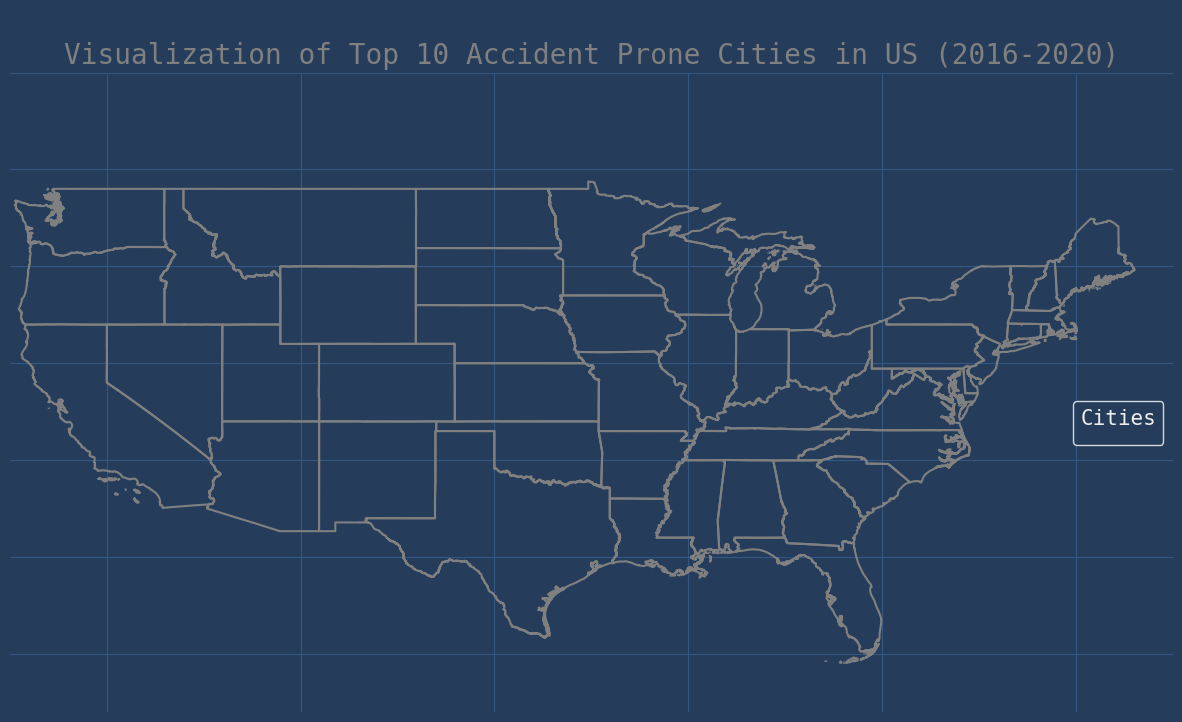

In [51]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_xlim([-125, -65])
ax.set_ylim([22, 55])
states.boundary.plot(ax=ax, color="grey")

colors = [
    "#e6194B",
    "#f58231",
    "#ffe119",
    "#bfef45",
    "#3cb44b",
    "#aaffc3",
    "#42d4f4",
    "#4363d8",
    "#911eb4",
    "#f032e6",
]
markersizes = [50 + (i * 20) for i in range(10)][::-1]
for i in range(10):
    geo_df_cities[geo_df_cities["City"] == top_ten_city_list[i]].plot(
        ax=ax,
        markersize=markersizes[i],
        color=colors[i],
        marker="o",
        label=top_ten_city_list[i],
        alpha=0.7,
    )

plt.legend(
    prop={"size": 13},
    loc="best",
    bbox_to_anchor=(0.5, 0.0, 0.5, 0.5),
    edgecolor="white",
    title="Cities",
    title_fontsize=15,
)

for i in ["bottom", "top", "left", "right"]:
    side = ax.spines[i]
    side.set_visible(False)

plt.tick_params(
    top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False
)

plt.title(
    "\nVisualization of Top 10 Accident Prone Cities in US (2016-2020)",
    size=20,
    color="grey",
);

### Temperature 

### Weather 

## Data Cleaning 

## Problem Statements

- 1110 cities reported only 1 accident for 4 years 
   - Further Investigation Required or ignore them for high level analysis  

## Conclusions

- (95 % Of Cities have less than 1000 Accidents in the time Series February 2016 to Dec 2021 )
- (05 % Of Cities have more than 1000 Accidents in the time Series February 2016 to Dec 2021 )